# Discrimination by Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safelog(x):
    return(np.log(x + 1e-100))

## Read Data

In [2]:
images = np.genfromtxt('hw02_data_set_images.csv',delimiter=',').reshape(5, 39, 320)
labels = np.char.strip(np.genfromtxt('hw02_data_set_labels.csv',delimiter=',',dtype=str),'"').reshape(5,39)

for index, key in enumerate(['A', 'B', 'C', 'D', 'E']):
    labels[labels == key] = index + 1
labels = labels.astype(int)

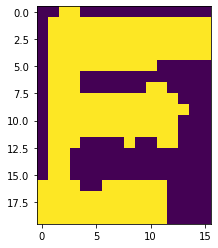

In [3]:
training_images = images[:,:25,:].reshape(125, 320)
training_l      = labels[:,:25].reshape(125,)
test_images     = images[:,25:,:].reshape(70, 320)
test_l          = labels[:,25:].reshape(70,)

plt.imshow(training_images[100,:].reshape(16,20).T)
plt.show()

K = np.max(training_l)
N_train = training_l.shape[0]
N_test = test_l.shape[0]


training_labels = np.zeros((N_train, K)).astype(int)
training_labels[range(N_train), training_l - 1] = 1

test_labels = np.zeros((N_test, K)).astype(int)
test_labels[range(N_test), test_l - 1] = 1

In [4]:
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [5]:
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((y_truth[:,c] - y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())/3

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

In [6]:
# set learning parameters
eta = 0.01
epsilon = 1e-3

In [7]:
W = np.random.uniform(low = -0.01, high = 0.01, size = (training_images.shape[-1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

$\textrm{Error} = -\sum\limits_{i = 1}^{N} \sum\limits_{c = 1}^{K} \left[ y_{ic}\log(\widehat{y}_{ic}) \right]$

In [9]:
iteration = 1
objective_values = []
while 1:
    Y_predicted = sigmoid(training_images, W, w0)
    print(training_images.shape)
    objective_values = np.append(objective_values, np.sum(0.5*((training_labels - Y_predicted)**2)))
    
    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(training_images, training_labels, Y_predicted)
    w0 = w0 - eta * gradient_w0(training_labels, Y_predicted)
    
    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break
    iteration = iteration + 1

(125, 320)


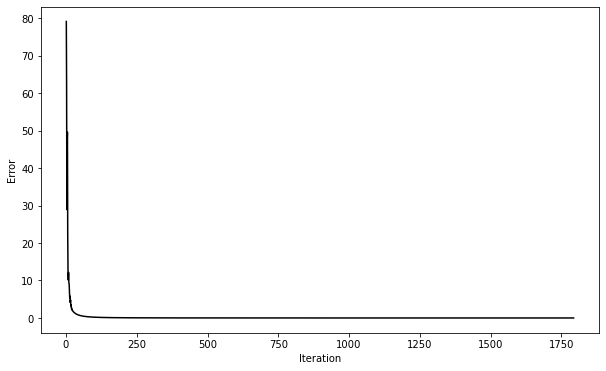

In [84]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [85]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted, np.sum(training_labels * np.array([1,2,3,4,5]), axis=1), rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)
print("\n====================")
print("\n====================")

y_train       1   2   3   4   5
y_predicted                    
1            25   0   0   0   0
2             0  25   0   0   0
3             0   0  25   0   0
4             0   0   0  25   0
5             0   0   0   0  25




In [86]:
Y_predicted_test = sigmoid(test_images, W, w0)

In [87]:
y_predicted_test = np.argmax(Y_predicted_test, axis = 1) + 1

confusion_matrix = pd.crosstab(y_predicted_test, np.sum(test_labels * np.array([1,2,3,4,5]), axis=1), rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix)

y_test        1   2   3   4   5
y_predicted                    
1            13   1   0   0   0
2             1  11   0   0   2
3             0   0  14   0   0
4             0   0   0  14   0
5             0   2   0   0  12
